In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [66]:
# Load the CSV file into a DataFrame
data = pd.read_csv('C:/Users/mja04/OneDrive/Data Science Capstone - MH/LCE.csv')


# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

# Convert 'Male' to 1 and 'Female' to 0
data['GENDER'] = data['GENDER'].replace({'Male': 1, 'Female': 0})

Unnamed: 0               0
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


In [68]:
# X: Features, Y: Target ('LUNG_CANCER')
X = data.drop('LUNG_CANCER', axis=1)
Y = data['LUNG_CANCER']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Print shapes of the resulting datasets to verify
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2400, 16) (600, 16) (2400,) (600,)


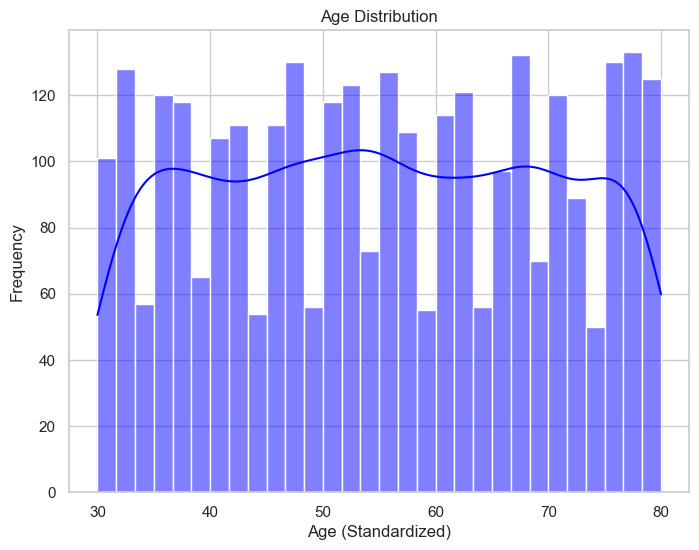

In [70]:
#Looking into age distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['AGE'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age (Standardized)')
plt.ylabel('Frequency')
plt.show()

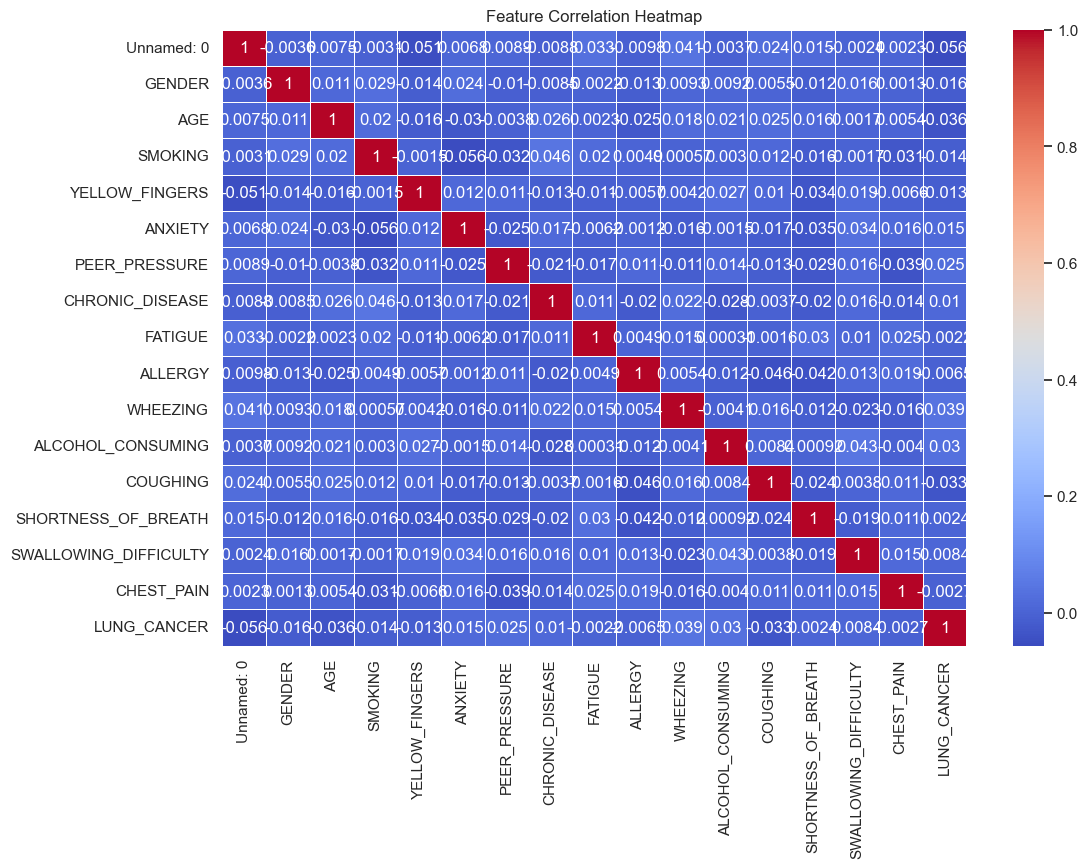

In [71]:
#Correlation Heatmap

plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [73]:
# As we can see from this age distribution for having lung cancer (1) and not (0) is that people who develop lung cancer have a median lower of around  

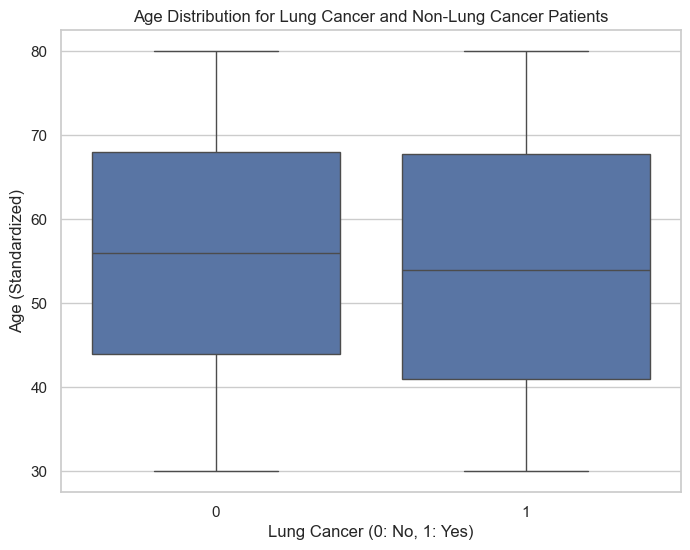

In [74]:
#Box Plot for Age vs. LUNG_CANCER
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['LUNG_CANCER'], y=data['AGE']  )
plt.title('Age Distribution for Lung Cancer and Non-Lung Cancer Patients')
plt.xlabel('Lung Cancer (0: No, 1: Yes)')
plt.ylabel('Age (Standardized)')
plt.show()

In [75]:
#Random Forest

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 51.17%


In [76]:
#SVM Model
from sklearn.svm import SVC

modelSVC = SVC()
modelSVC.fit(X_train, Y_train)
y_pred = modelSVC.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.49


In [79]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 48.00%


In [81]:
#Use Baggging on C4.5
#Use Bagging on Classification and Regression Trees
#Use Bagging on Neural Networks. 

In [82]:
# Use adaboost? When wanting to decrease variance or bias. 

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix and classification report
print('Confusion Matrix:')

print('Classification Report:')
print(classification_report(Y_test, y_pred))

Accuracy: 51.50%
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       302
           1       0.51      0.55      0.53       298

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.51       600
weighted avg       0.52      0.52      0.51       600

